In [3]:
import mdtraj as md
import numpy as np
import glob

In [26]:
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt

import seaborn as sns
sns.set_style('ticks')

In [2]:
pwd

'/Users/rafalpwiewiora/repos/MSM/11708_11710_SET8_ligands/dih/SAM/cluster_centers_top_10'

In [13]:
microstate_order = []
microstates_loaded = []

for i in range(100):
    filename = 'h5_reimaged/%d.h5' % i
    if filename in glob.glob('h5_reimaged/*.h5'):
        microstate_order.append(i)
        traj = md.load(filename)
        traj = traj.atom_slice(traj.top.select('protein'))
        microstates_loaded.append(traj)

In [15]:
cluster_top10 = microstates_loaded

In [16]:
zkk = md.load('/Users/rafalpwiewiora/repos/MSM/sasa/models/1zkk_a.pdb')
ij8 = md.load('/Users/rafalpwiewiora/repos/MSM/sasa/models/4ij8_a.pdb')
apo = md.load('/Users/rafalpwiewiora/repos/MSM/sasa/models/apo_a.pdb')

In [17]:
cluster_top10_ca = [x.atom_slice(x.top.select('name CA')) for x in cluster_top10]

In [18]:
zkk_ca = zkk.atom_slice(zkk.top.select('name CA'))
ij8_ca = ij8.atom_slice(ij8.top.select('name CA'))
apo_ca = apo.atom_slice(apo.top.select('name CA'))

In [20]:
whole_rmsds = []
seti_rmsds = []
cflank_rmsds = []
selection1 = np.concatenate([np.arange(24,59), np.arange(94,144)])

for i in range(len(cluster_top10_ca)):
    trajectory = cluster_top10_ca[i]
    whole_rmsds.append([])
    seti_rmsds.append([])
    cflank_rmsds.append([])
         
    # whole protein
    reference = zkk_ca                        
    trajectory.superpose(reference, atom_indices=selection1)
    whole_rmsds[-1].append(np.sqrt(3*np.mean((trajectory.xyz - reference.xyz)**2, axis=(1,2))))
    
    reference = ij8_ca                        
    trajectory.superpose(reference, atom_indices=selection1)
    whole_rmsds[-1].append(np.sqrt(3*np.mean((trajectory.xyz - reference.xyz)**2, axis=(1,2))))
                            
    reference = apo_ca                        
    trajectory.superpose(reference, atom_indices=selection1)
    whole_rmsds[-1].append(np.sqrt(3*np.mean((trajectory.xyz - reference.xyz)**2, axis=(1,2))))
    
    # SETI
    selection2 = np.arange(59,94) 
                            
    reference = zkk_ca            
    trajectory.superpose(reference, atom_indices=selection1)
    seti_rmsds[-1].append(np.sqrt(3*np.mean((trajectory.xyz[:, selection2, :] - reference.xyz[:, selection2, :])**2, axis=(1,2))))
    
    reference = ij8_ca            
    trajectory.superpose(reference, atom_indices=selection1)
    seti_rmsds[-1].append(np.sqrt(3*np.mean((trajectory.xyz[:, selection2, :] - reference.xyz[:, selection2, :])**2, axis=(1,2))))                  
    
    reference = apo_ca            
    trajectory.superpose(reference, atom_indices=selection1)
    seti_rmsds[-1].append(np.sqrt(3*np.mean((trajectory.xyz[:, selection2, :] - reference.xyz[:, selection2, :])**2, axis=(1,2)))) 
    
    # Cflank
    selection2 = np.arange(144,162) 
                            
    reference = zkk_ca            
    trajectory.superpose(reference, atom_indices=selection1)
    cflank_rmsds[-1].append(np.sqrt(3*np.mean((trajectory.xyz[:, selection2, :] - reference.xyz[:, selection2, :])**2, axis=(1,2))))
    
    reference = ij8_ca            
    trajectory.superpose(reference, atom_indices=selection1)
    cflank_rmsds[-1].append(np.sqrt(3*np.mean((trajectory.xyz[:, selection2, :] - reference.xyz[:, selection2, :])**2, axis=(1,2))))                        
    
    reference = apo_ca            
    trajectory.superpose(reference, atom_indices=selection1)
    cflank_rmsds[-1].append(np.sqrt(3*np.mean((trajectory.xyz[:, selection2, :] - reference.xyz[:, selection2, :])**2, axis=(1,2))))                        

In [22]:
len(whole_rmsds)

67

In [23]:
meta_membs = np.load('/Users/rafalpwiewiora/repos/MSM/11708_11710_SET8_ligands/dih/SAM/hmms/results/12/metastable_memberships.npy')

In [25]:
meta_membs.shape

(67, 10)

In [27]:
bc_sam_only_rmsds = []

for i in range(10):
    j = np.argmax(meta_membs[:,i])
    bc_sam_only_rmsds.append(whole_rmsds[j][1][0])

In [28]:
bc_sam_only_rmsds

[0.4214775,
 0.41010973,
 0.40726525,
 0.6014486,
 0.3547788,
 0.46710035,
 0.37915003,
 0.55817425,
 0.36352184,
 0.64871389]

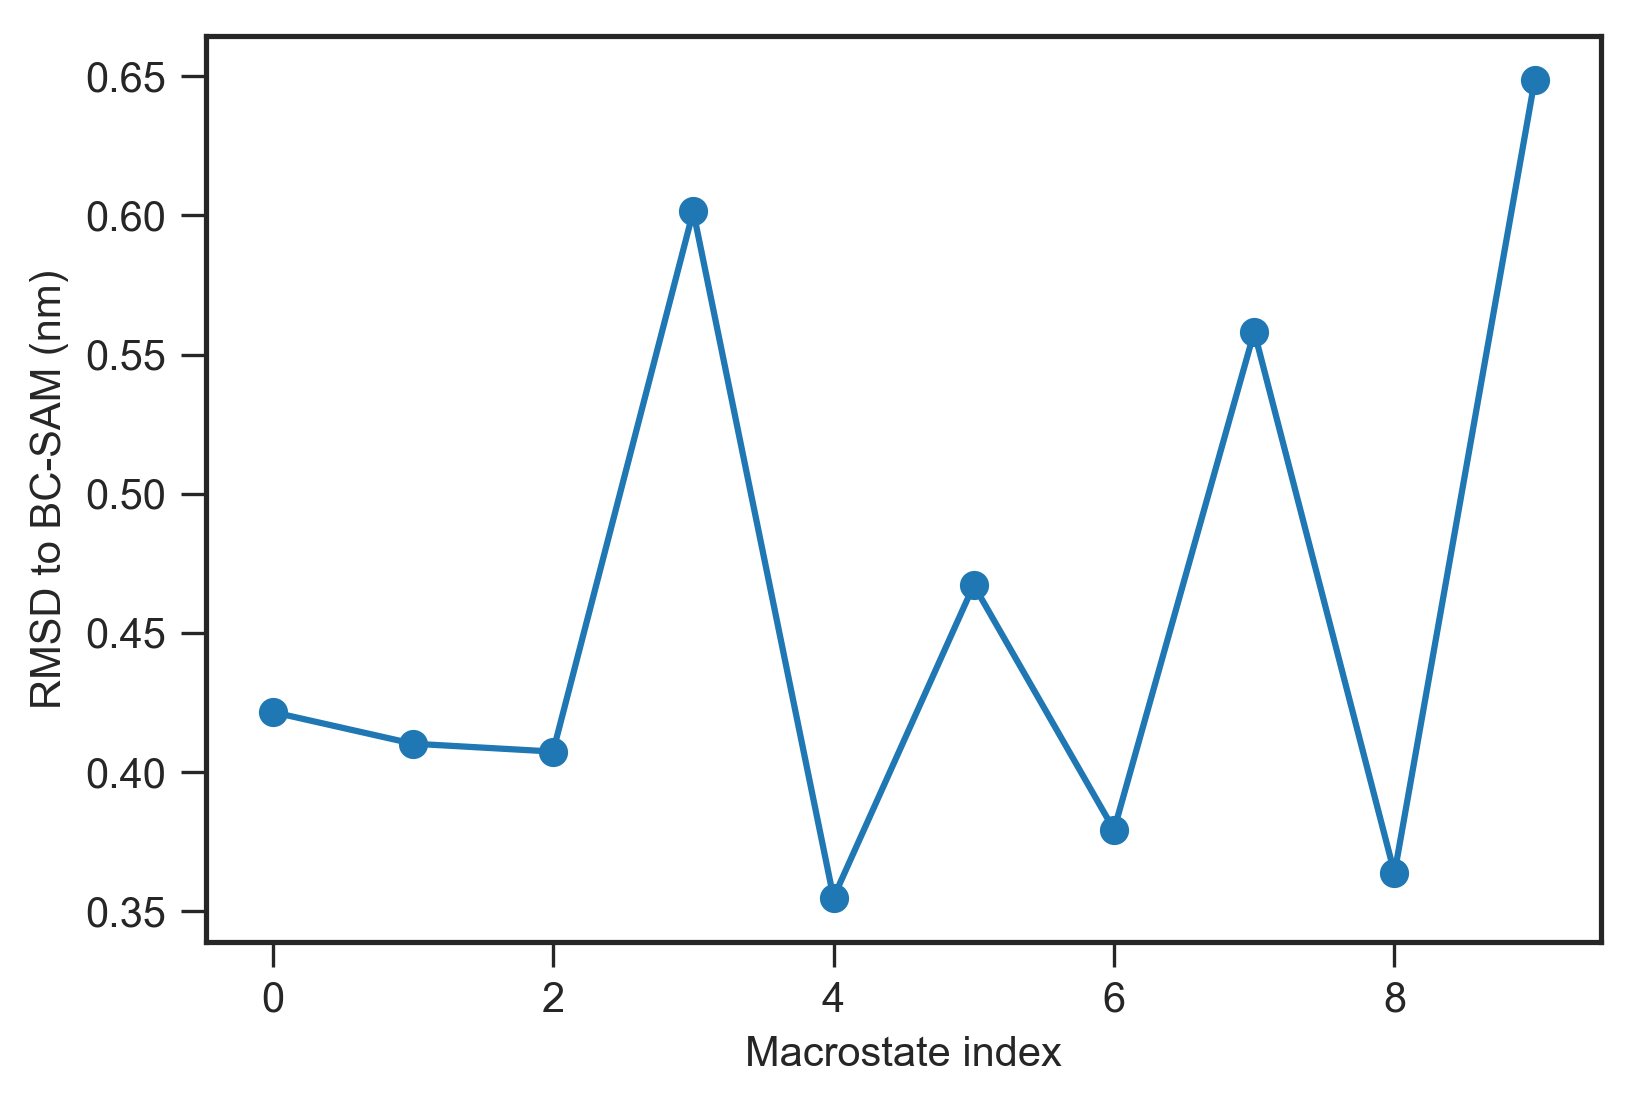

In [33]:
fig, ax = plt.subplots(dpi=300)
ax.plot(range(len(bc_sam_only_rmsds)), bc_sam_only_rmsds)
ax.scatter(range(len(bc_sam_only_rmsds)), bc_sam_only_rmsds)
plt.xlabel('Macrostate index')
plt.ylabel('RMSD to BC-SAM (nm)')
plt.savefig('custom_rmsd/bc_sam_top_microstate_macrostate_rmsd.png', dpi=300)
plt.savefig('custom_rmsd/bc_sam_top_microstate_macrostate_rmsd.pdf', dpi=300)
plt.show()

In [34]:
np.savetxt('custom_rmsd/bc_sam_top_microstate_macrostate_rmsd.csv', bc_sam_only_rmsds, delimiter=',')

In [35]:
# now save all 3D RMSD data to csv

In [43]:
tc_only_rmsds = []
bc_sam_only_rmsds = []
apo_only_rmsds = []

for i in range(10):
    j = np.argmax(meta_membs[:,i])
    tc_only_rmsds.append(whole_rmsds[j][0][0])

for i in range(10):
    j = np.argmax(meta_membs[:,i])
    bc_sam_only_rmsds.append(whole_rmsds[j][1][0])
    
for i in range(10):
    j = np.argmax(meta_membs[:,i])
    apo_only_rmsds.append(whole_rmsds[j][2][0])

In [48]:
tc_only_rmsds_micro = []
bc_sam_only_rmsds_micro = []
apo_only_rmsds_micro = []

for i in range(67):
    tc_only_rmsds_micro.append(whole_rmsds[i][0][0])

for i in range(67):
    bc_sam_only_rmsds_micro.append(whole_rmsds[i][1][0])
    
for i in range(67):
    apo_only_rmsds_micro.append(whole_rmsds[i][2][0])

In [51]:
pwd

'/Users/rafalpwiewiora/repos/MSM/11708_11710_SET8_ligands/dih/SAM/cluster_centers_top_10'

In [52]:
#mkdir rmsd_data

In [53]:
np.savetxt('rmsd_data/macro_TC.csv', tc_only_rmsds, delimiter=',')
np.savetxt('rmsd_data/macro_BC-SAM.csv', bc_sam_only_rmsds, delimiter=',')
np.savetxt('rmsd_data/macro_APO.csv', apo_only_rmsds, delimiter=',')

In [54]:
np.savetxt('rmsd_data/micro_TC.csv', tc_only_rmsds_micro, delimiter=',')
np.savetxt('rmsd_data/micro_BC-SAM.csv', bc_sam_only_rmsds_micro, delimiter=',')
np.savetxt('rmsd_data/micro_APO.csv', apo_only_rmsds_micro, delimiter=',')

In [1]:
# add to this Inh1 and Inh2

In [11]:
import mdtraj as md
import numpy as np
import glob

In [12]:
microstate_order = []
microstates_loaded = []

for i in range(100):
    filename = 'h5_reimaged/%d.h5' % i
    if filename in glob.glob('h5_reimaged/*.h5'):
        microstate_order.append(i)
        traj = md.load(filename)
        traj = traj.atom_slice(traj.top.select('protein'))
        microstates_loaded.append(traj)

In [16]:
cluster_top10 = microstates_loaded

In [14]:
meta_membs = np.load('/Users/rafalpwiewiora/repos/MSM/11708_11710_SET8_ligands/dih/SAM/hmms/results/12/metastable_memberships.npy')

In [19]:
inh1 = md.load('/Users/rafalpwiewiora/repos/MSM/sasa/models/inh_a.pdb')
inh2 = md.load('/Users/rafalpwiewiora/repos/MSM/sasa/models/inh2_a.pdb')

In [17]:
cluster_top10_ca = [x.atom_slice(x.top.select('name CA')) for x in cluster_top10]

In [20]:
inh1_ca = inh1.atom_slice(inh1.top.select('name CA'))
inh2_ca = inh1.atom_slice(inh2.top.select('name CA'))

In [23]:
whole_rmsds = []
selection1 = np.concatenate([np.arange(24,59), np.arange(94,144)])

for i in range(len(cluster_top10_ca)):
    trajectory = cluster_top10_ca[i]
    whole_rmsds.append([])
         
    # whole protein
    reference = inh1_ca                        
    trajectory.superpose(reference, atom_indices=selection1)
    whole_rmsds[-1].append(np.sqrt(3*np.mean((trajectory.xyz - reference.xyz)**2, axis=(1,2))))
    
    reference = inh2_ca                        
    trajectory.superpose(reference, atom_indices=selection1)
    whole_rmsds[-1].append(np.sqrt(3*np.mean((trajectory.xyz - reference.xyz)**2, axis=(1,2))))  

In [25]:
inh1_only_rmsds = []
inh2_only_rmsds = []

for i in range(10):
    j = np.argmax(meta_membs[:,i])
    inh1_only_rmsds.append(whole_rmsds[j][0][0])

for i in range(10):
    j = np.argmax(meta_membs[:,i])
    inh2_only_rmsds.append(whole_rmsds[j][1][0])

In [26]:
inh1_only_rmsds_micro = []
inh2_only_rmsds_micro = []

for i in range(67):
    inh1_only_rmsds_micro.append(whole_rmsds[i][0][0])

for i in range(67):
    inh2_only_rmsds_micro.append(whole_rmsds[i][1][0])

In [27]:
np.savetxt('rmsd_data/macro_BC-Inh1.csv', inh2_only_rmsds, delimiter=',')
np.savetxt('rmsd_data/macro_BC-Inh2.csv', inh1_only_rmsds, delimiter=',')

In [28]:
np.savetxt('rmsd_data/micro_BC-Inh1.csv', inh2_only_rmsds_micro, delimiter=',')
np.savetxt('rmsd_data/micro_BC-Inh2.csv', inh1_only_rmsds_micro, delimiter=',')